In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [2]:
data = pd.read_csv('students.csv')
print(data.head())

print("\nMissing values:\n", data.isnull().sum())
print("\nData summary:\n", data.describe())

   Study Hours  Attendance  Pass
0    11.490142   89.261775     1
1     9.585207   99.094166     1
2    11.943066   66.014324     0
3    14.569090   85.629692     1
4     9.297540   73.493574     1

Missing values:
 Study Hours    0
Attendance     0
Pass           0
dtype: int64

Data summary:
        Study Hours  Attendance        Pass
count   500.000000  500.000000  500.000000
mean     10.017398   80.238016    0.668000
std       2.932324    9.596424    0.471403
min       0.276198   53.031134    0.000000
25%       7.899078   74.047083    0.000000
50%      10.038391   80.285316    1.000000
75%      11.910350   86.512423    1.000000
max      20.000000  100.000000    1.000000


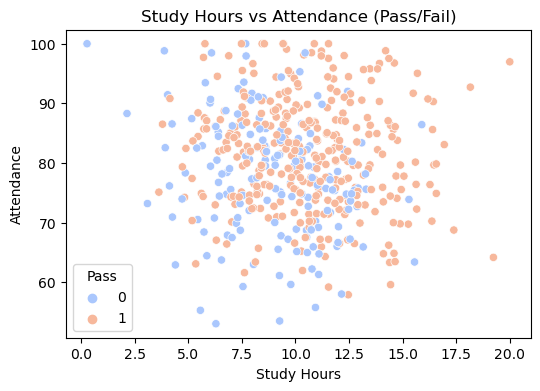

In [4]:
# Plot: Study Hours vs Attendance colored by Pass/Fail
plt.figure(figsize=(6,4))
sns.scatterplot(data=data, x='Study Hours', y='Attendance', hue='Pass', palette='coolwarm')
plt.title('Study Hours vs Attendance (Pass/Fail)')
plt.show()

In [6]:
X = data[['Study Hours', 'Attendance']]
y = data['Pass']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training
model = LogisticRegression()
model.fit(X_train, y_train)

# Model Evaluation
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.2f}")


Accuracy: 0.71


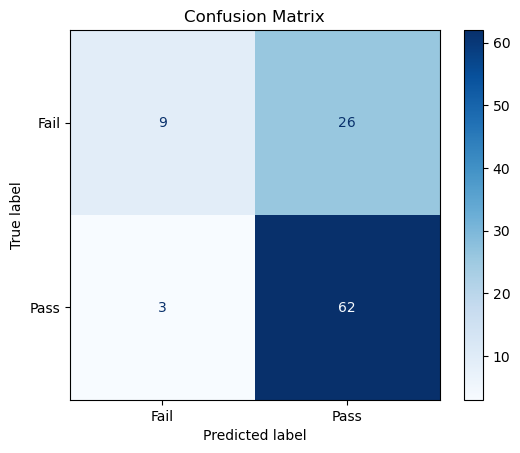

In [7]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Fail', 'Pass'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


In [8]:
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
})
print("\nFeature Importance (Model Coefficients):")
print(coefficients)


Feature Importance (Model Coefficients):
       Feature  Coefficient
0  Study Hours     0.230059
1   Attendance     0.051569


In [11]:
#TASK 2

In [12]:
#Sentiment Analysis with NLP

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import nltk
import re


In [14]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\saiteja\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
df = pd.read_csv('reviews.csv')
print(df.head())


          Review Text Sentiment
0  Damaged on arrival  negative
1   Broke immediately  negative
2  Didn't work at all  negative
3    Highly recommend  positive
4    Wonderful result  positive


In [16]:
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

df['Cleaned Text'] = df['Review Text'].apply(preprocess_text)
print(df[['Review Text', 'Cleaned Text']].head())


          Review Text       Cleaned Text
0  Damaged on arrival    damaged arrival
1   Broke immediately  broke immediately
2  Didn't work at all         didnt work
3    Highly recommend   highly recommend
4    Wonderful result   wonderful result


In [20]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['Cleaned Text'])
y = df['Sentiment'].map({'positive': 1, 'negative': 0})

#Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['negative', 'positive']))



Classification Report:
              precision    recall  f1-score   support

    negative       0.50      1.00      0.67         6
    positive       1.00      0.57      0.73        14

    accuracy                           0.70        20
   macro avg       0.75      0.79      0.70        20
weighted avg       0.85      0.70      0.71        20



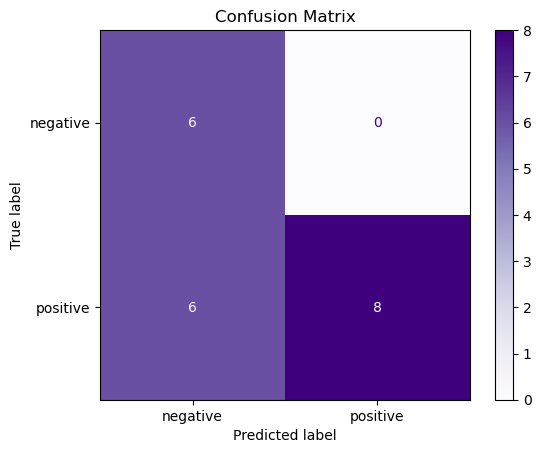

In [21]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['negative', 'positive'])
disp.plot(cmap='Purples')
plt.title('Confusion Matrix')
plt.show()

In [22]:
results = pd.DataFrame({
    'Review': df.iloc[y_test.index]['Review Text'],
    'True Sentiment': y_test.map({0: 'negative', 1: 'positive'}),
    'Predicted': pd.Series(y_pred, index=y_test.index).map({0: 'negative', 1: 'positive'})
})
print("\nSample Predictions:")
print(results)


Sample Predictions:
                  Review True Sentiment Predicted
83   Couldn't be happier       positive  positive
53     Excellent quality       positive  negative
70       Not recommended       negative  negative
45    Impressive quality       positive  negative
44      Highly recommend       positive  positive
39  I loved this product       positive  negative
22            Top-notch!       positive  positive
80    Didn't work at all       negative  negative
10    Very happy with it       positive  positive
0     Damaged on arrival       negative  negative
18     Excellent quality       positive  negative
30      Highly recommend       positive  positive
73        Very satisfied       positive  positive
33    Amazing experience       positive  negative
90    Completely useless       negative  negative
4       Wonderful result       positive  positive
76      Terrible product       negative  negative
77         Fast delivery       positive  positive
12    Didn't work at all     